# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Get the HTML content of the page
html = browser.html

# Create a BeautifulSoup object
soup_obj = soup(html, 'html.parser')

# Print the HTML source code
print(soup_obj.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
Soup = soup(html, 'html.parser')

In [6]:
# Find the table
table = Soup.find('table')

In [7]:
# Check if the table element exists
if table:
    # Initialize lists to store table data
    headers = []
    data = []

    # Extract table headers (usually found in the <th> elements)
    header_row = table.find('tr')
    header_cells = header_row.find_all('th')
    for cell in header_cells:
        headers.append(cell.text.strip())

    # Extract table data from rows and cells
    data_rows = table.find_all('tr')[1:]  # Skip the first row with headers

    for row in data_rows:
        row_data = []
        cells = row.find_all('td')  # You can also use 'th' for table header cells
        for cell in cells:
            row_data.append(cell.text.strip())
        data.append(row_data)

    # Create a DataFrame (a data structure provided by pandas) for the scraped data
    table_data = pd.DataFrame(data, columns=headers)

In [8]:
table_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Extract all rows of data


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Assuming you have already obtained the BeautifulSoup object named `soup_obj` as shown in your previous code

# Find the HTML table element by its tag name (e.g., 'table')
table = soup_obj.find('table')

# Check if the table element exists
if table:
    # Initialize lists to store table data
    ids = []
    terrestrial_dates = []
    sols = []
    ls_values = []
    months = []
    min_temperatures = []
    pressures = []

    # Extract table data from rows and cells
    data_rows = table.find_all('tr')[1:]  # Skip the first row with headers

    for row in data_rows:
        cells = row.find_all('td')

        # Check if there are enough cells in the row
        if len(cells) == 7:
            id_, terrestrial_date, sol, ls, month, min_temp, pressure = [cell.text.strip() for cell in cells]

            ids.append(id_)
            terrestrial_dates.append(terrestrial_date)
            sols.append(sol)
            ls_values.append(ls)
            months.append(month)
            min_temperatures.append(min_temp)
            pressures.append(pressure)

    # Create a DataFrame
    data = {
        'id': ids,
        'terrestrial_date': terrestrial_dates,
        'sol': sols,
        'ls': ls_values,
        'month': months,
        'min_temp': min_temperatures,
        'pressure': pressures
    }
    table_data = pd.DataFrame(data)



In [11]:
table_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [14]:
# Confirm DataFrame was created successfully


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column


In [16]:
# Print the data types of each column
print(table_data.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# Change data types for data analysis


In [18]:
# Confirm type changes were successful by examining data types again


In [19]:
# Assuming you have the DataFrame named `table_data` from the previous code

# Convert columns to the specified data types
table_data['id'] = table_data['id'].astype('object')
table_data['terrestrial_date'] = pd.to_datetime(table_data['terrestrial_date'])
table_data['sol'] = table_data['sol'].astype('int64')
table_data['ls'] = table_data['ls'].astype('int64')
table_data['month'] = table_data['month'].astype('int64')
table_data['min_temp'] = table_data['min_temp'].astype('float64')
table_data['pressure'] = table_data['pressure'].astype('float64')

# Print the updated data types
print(table_data.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?


In [21]:
# Assuming you have the DataFrame named `table_data` from the previous code

# Count the occurrences of each Martian month
month_counts = table_data['month'].value_counts()

# Sort the counts by month (index) and reset the index to display the result in the desired format
month_counts = month_counts.sort_index().reset_index()

# Rename the columns for clarity
month_counts.columns = ['Month', 'Count']

# Print the result
print(month_counts)


    Month  Count
0       1    174
1       2    178
2       3    192
3       4    194
4       5    149
5       6    147
6       7    142
7       8    141
8       9    134
9      10    112
10     11    138
11     12    166


In [22]:
# Assuming you have the DataFrame named `table_data` from the previous code

# Count the number of unique Martian months
unique_months = table_data['month'].nunique()

# Print the result
print("Number of unique Martian months:", unique_months)


Number of unique Martian months: 12


In [23]:
# 2. How many Martian days' worth of data are there?


In [24]:
# Assuming you have the DataFrame named `table_data` from the previous code

# Count the number of unique Martian days (sols)
unique_sols = table_data['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", unique_sols)


Number of Martian days' worth of data: 1867


In [25]:
# 3. What is the average low temperature by month?


In [26]:
# Assuming you have the DataFrame named `table_data` from the previous code

# Group the data by 'month' and calculate the mean of 'min_temp'
average_temp_by_month = table_data.groupby('month')['min_temp'].mean()

# Print the result
print(average_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [27]:
# Plot the average temperature by month


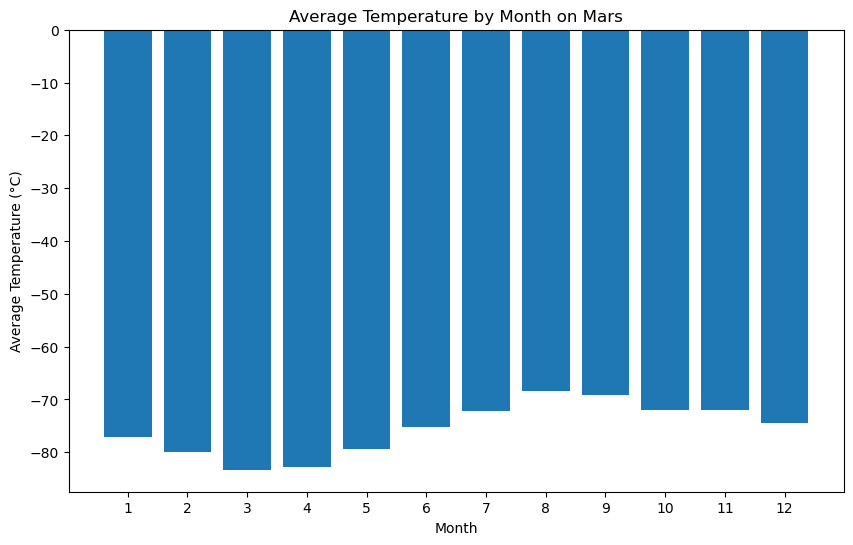

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'average_low_by_month' from the previous code

# Create a bar plot for the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_temp_by_month.index, average_temp_by_month, tick_label=average_temp_by_month.index)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Month on Mars')
plt.xticks(range(1, 13))  # Assuming months are 1 to 12

# Show the plot
plt.show()


In [29]:
# Identify the coldest and hottest months in Curiosity's location


In [30]:
# Assuming you have calculated 'average_temp_by_month' from the previous code

# Find the month with the lowest temperature
lowest_temperature_month = average_temp_by_month.idxmin()
lowest_temperature_value = average_temp_by_month.min()

# Find the month with the highest temperature
highest_temperature_month = average_temp_by_month.idxmax()
highest_temperature_value = average_temp_by_month.max()

print("Month with Lowest Temperature:", lowest_temperature_month)
print("Lowest Temperature (°C):", lowest_temperature_value)

print("Month with Highest Temperature:", highest_temperature_month)
print("Highest Temperature (°C):", highest_temperature_value)


Month with Lowest Temperature: 3
Lowest Temperature (°C): -83.30729166666667
Month with Highest Temperature: 8
Highest Temperature (°C): -68.38297872340425


In [31]:
# 4. Average pressure by Martian month


In [32]:
# Group the data by Martian month and calculate the average pressure for each month
average_pressure_by_month = table_data.groupby('month')['pressure'].mean()

# Create a Pandas DataFrame from the calculated averages
pressure_df = pd.DataFrame({'Martian Month': average_pressure_by_month.index, 'Average Pressure': average_pressure_by_month})
pressure_df

,Martian Month,Average Pressure
month,,
1,1,862.488506
2,2,889.455056
3,3,877.322917
4,4,806.329897
5,5,748.557047
6,6,745.054422
7,7,795.105634
8,8,873.829787
9,9,913.305970


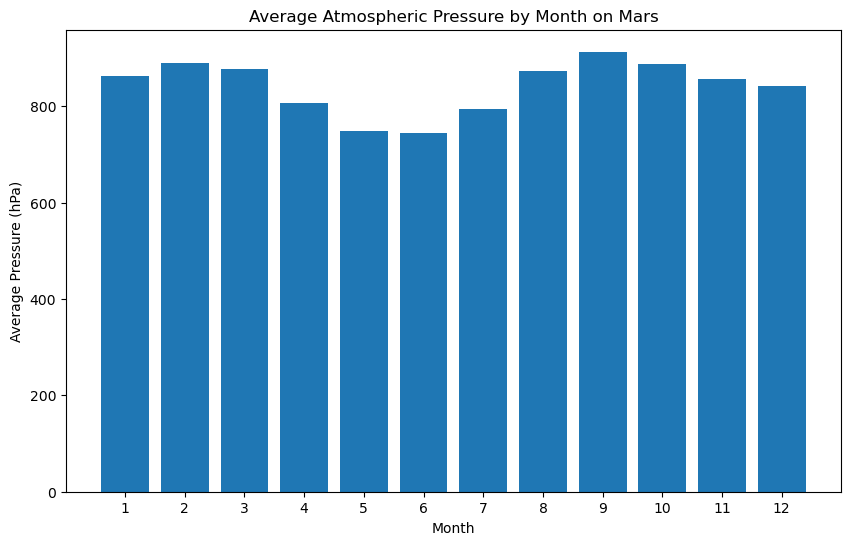

In [33]:

# Create a bar plot for the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month, tick_label=average_pressure_by_month.index)
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xticks(range(1, 13))  # Assuming months are 1 to 12

# Show the plot
plt.show()


In [34]:
# Assuming you have calculated 'average_pressure_by_month' from the previous code

# Find the month with the lowest atmospheric pressure
lowest_pressure_month = average_pressure_by_month.idxmin()
lowest_pressure_value = average_pressure_by_month.min()

# Find the month with the highest atmospheric pressure
highest_pressure_month = average_pressure_by_month.idxmax()
highest_pressure_value = average_pressure_by_month.max()

print("Month with Lowest Atmospheric Pressure:", lowest_pressure_month)
print("Lowest Atmospheric Pressure (hPa):", lowest_pressure_value)

print("Month with Highest Atmospheric Pressure:", highest_pressure_month)
print("Highest Atmospheric Pressure (hPa):", highest_pressure_value)


Month with Lowest Atmospheric Pressure: 6
Lowest Atmospheric Pressure (hPa): 745.0544217687075
Month with Highest Atmospheric Pressure: 9
Highest Atmospheric Pressure (hPa): 913.3059701492538


In [35]:
# Plot the average pressure by month


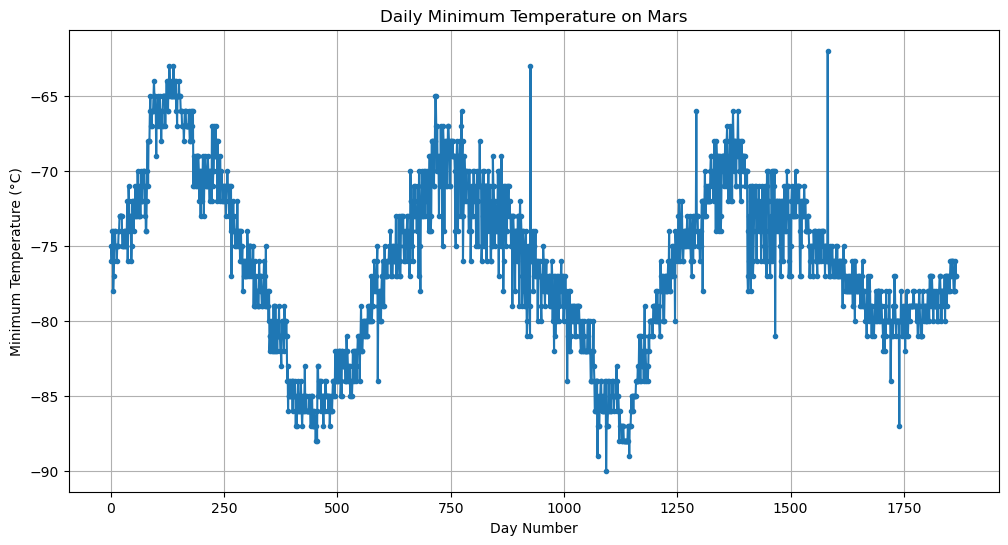

In [36]:
# Create a line plot of the daily minimum temperature with the x-axis representing the index (day number)
plt.figure(figsize=(12, 6))
plt.plot(table_data.index, table_data['min_temp'], marker='o', markersize=3, linestyle='-')
plt.xlabel('Day Number')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)

# Show the plot
plt.show()

In [37]:
# 5. How many terrestrial (earth) days are there in a Martian year?


In [43]:
# Find the first peak on the graph to calculate the year
range_start = 500
range_end = 750

# Filter the data within the specified range
filtered_data = table_data[(table_data.index >= range_start) & (table_data.index <= range_end)]

# Find the day with the highest value
day_of_highest_value1 = filtered_data['min_temp'].idxmax()

highest_value1 = filtered_data['min_temp'].max()

print("Day 1 with Highest Value within Range:", day_of_highest_value1)
print("Highest Value within Range:", highest_value1, "°C")



Day 1 with Highest Value within Range: 716
Highest Value within Range: -65.0 °C


In [44]:
# Find the second peak
range_start = 1350
range_end = 1500

# Filter the data within the specified range
filtered_data = table_data[(table_data.index >= range_start) & (table_data.index <= range_end)]

# Find the day with the highest value
day_of_highest_value2 = filtered_data['min_temp'].idxmax()

highest_value2 = filtered_data['min_temp'].max()

print("Day 2 with Highest Value within Range:", day_of_highest_value2)
print("Highest Value within Range:", highest_value2, "°C")


Day 2 with Highest Value within Range: 1373
Highest Value within Range: -66.0 °C


In [40]:
# Calculate the difference in days between the 2 peaks to calculate how long a year is on Mars
day_difference = day_of_highest_value2 - day_of_highest_value1

print("Mars has this many days:", day_difference)

Mars has this many days: 657


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly between days 716 and 1373, or 657 days. A year on Mars appears to be about 657 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
# Define the path to the resources folder and the CSV file name
resource_folder = 'Resources'  # Replace with the actual folder name if different
csv_filename = 'table_data.csv'

# Construct the full file path
file_path = f"{resource_folder}/{csv_filename}"

# Export the DataFrame to the CSV file
table_data.to_csv(file_path, index=False)

In [42]:
browser.quit()